# Exploratory Data Analysis (EDA) for Student Dropout Prediction
-------------------------------------------------------------
This notebook explores the UCI Student Dropout and Academic Success dataset (id=697) to understand the factors associated with student dropout, graduation, and enrollment. Each section below focuses on a different aspect of the data, with visualizations and summary statistics to guide feature engineering and modeling decisions.


In [2]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

## 1. Load Dataset
We begin by loading the dataset from the UCI Machine Learning Repository. This dataset contains demographic, academic, socioeconomic, and macroeconomic features for students, along with their final status (Dropout, Enrolled, Graduate).

In [3]:
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)
df = predict_students_dropout_and_academic_success.data.original.copy()
df.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## 2. Target Variable Analysis
Understanding the distribution of the target variable is crucial for modeling. Here, we visualize the class balance between Dropout, Enrolled, and Graduate students.

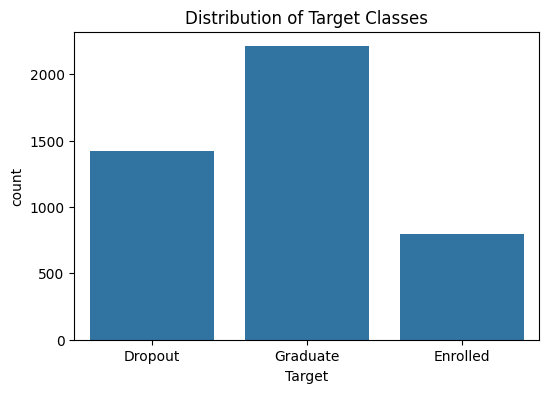

Target
Graduate    0.499322
Dropout     0.321203
Enrolled    0.179476
Name: proportion, dtype: float64

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Classes')
plt.show()
display(df['Target'].value_counts(normalize=True))
os.makedirs('eda_outputs', exist_ok=True)
df['Target'].value_counts(normalize=True).to_csv('eda_outputs/eda_target_value_counts.csv')

## 3. Demographic Features
We explore how demographic variables such as marital status, gender, age at enrollment, and nationality relate to student outcomes. This helps identify potential risk groups.

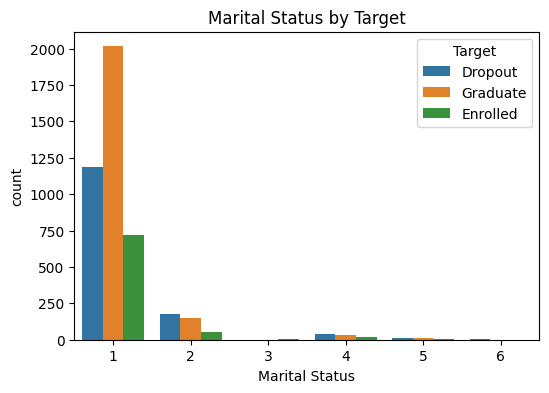

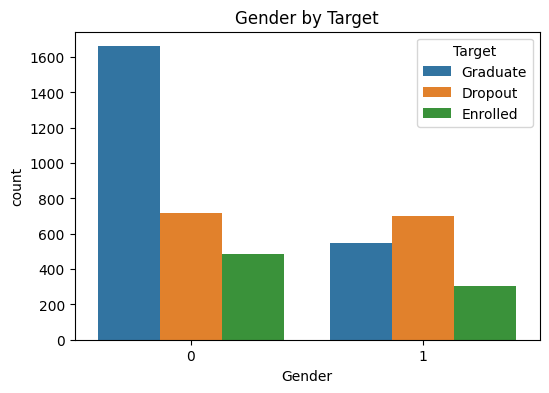

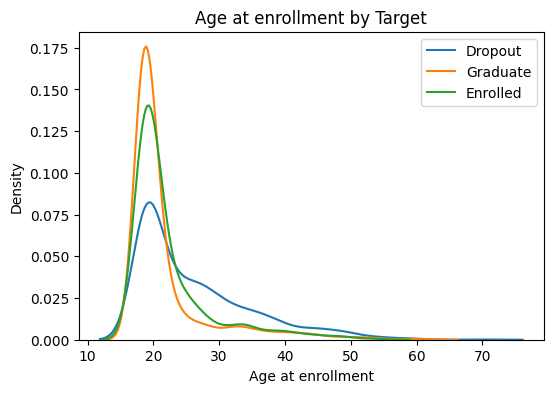

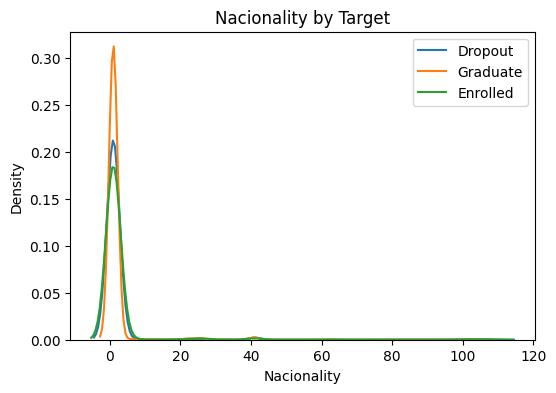

In [5]:
demographic_vars = ['Marital Status', 'Gender', 'Age at enrollment', 'Nacionality']
for var in demographic_vars:
    plt.figure(figsize=(6,4))
    if df[var].nunique() < 20:
        sns.countplot(x=var, hue='Target', data=df)
        # Export value counts by target
        vc = df.groupby('Target')[var].value_counts().unstack(fill_value=0)
        clean_var_name = (
            var.replace(" ", "_")
               .replace("(", "")
               .replace(")", "")
               .replace("'", "")
               .replace("/", "_")
               .replace("\\", "_")
               .lower()
        )
        vc.to_csv(f'eda_outputs/eda_{clean_var_name}_by_target.csv')
    else:
        for t in df['Target'].unique():
            sns.kdeplot(df[df['Target']==t][var], label=t)
        plt.legend()
    plt.title(f'{var} by Target')
    plt.show()

## 4. Academic Background
This section examines students' prior academic qualifications and their parents' education, which may influence academic success or dropout risk.

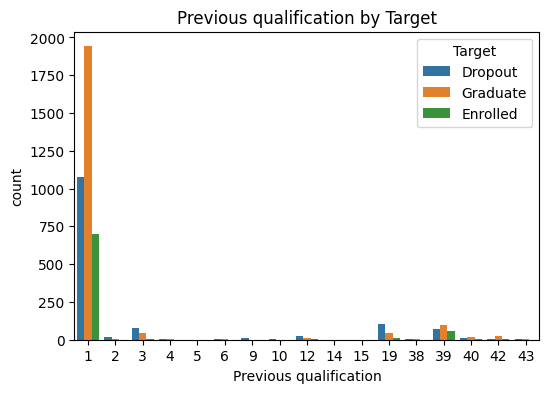

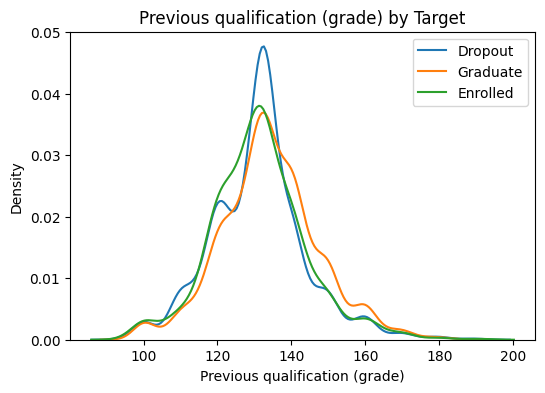

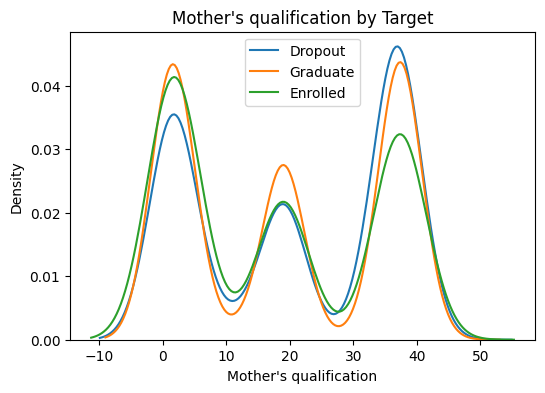

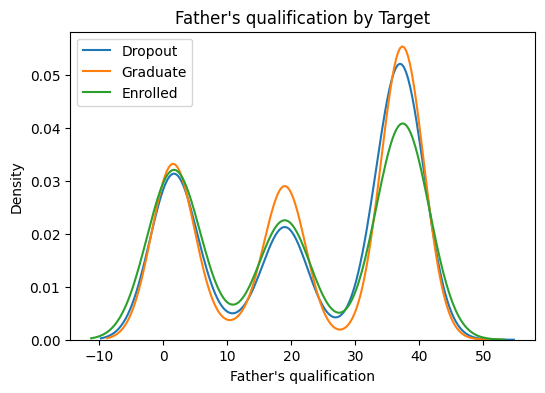

In [6]:
background_vars = ['Previous qualification', 'Previous qualification (grade)', "Mother's qualification", "Father's qualification"]
for var in background_vars:
    plt.figure(figsize=(6,4))
    if df[var].nunique() < 20:
        sns.countplot(x=var, hue='Target', data=df)
        vc = df.groupby('Target')[var].value_counts().unstack(fill_value=0)
        clean_var_name = (
            var.replace(" ", "_")
               .replace("(", "")
               .replace(")", "")
               .replace("'", "")
               .replace("/", "_")
               .replace("\\", "_")
               .lower()
        )
        vc.to_csv(f'eda_outputs/eda_{clean_var_name}_by_target.csv')
    else:
        for t in df['Target'].unique():
            sns.kdeplot(df[df['Target']==t][var], label=t)
        plt.legend()
    plt.title(f'{var} by Target')
    plt.show()

## 5. Socioeconomic Features
Socioeconomic factors such as parents' occupation, scholarship status, and displacement are analyzed to see their impact on student outcomes.

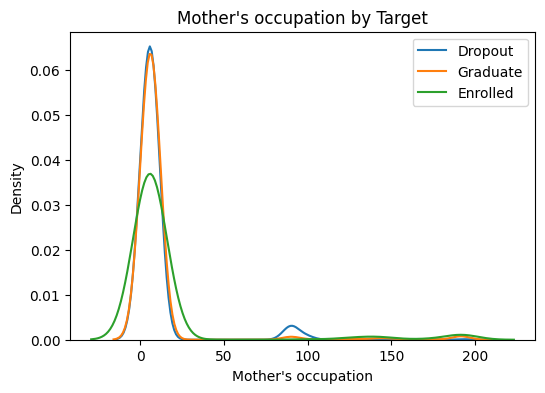

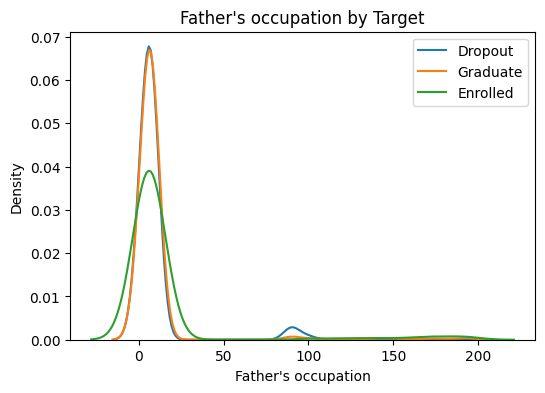

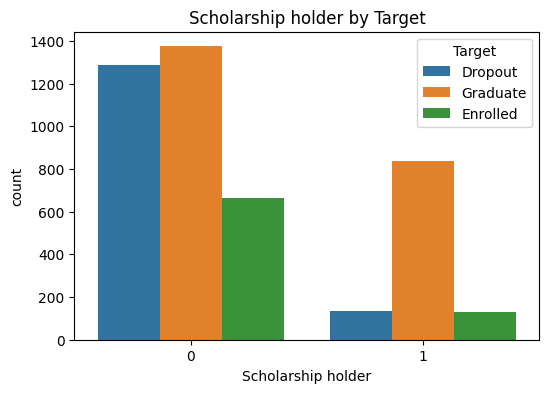

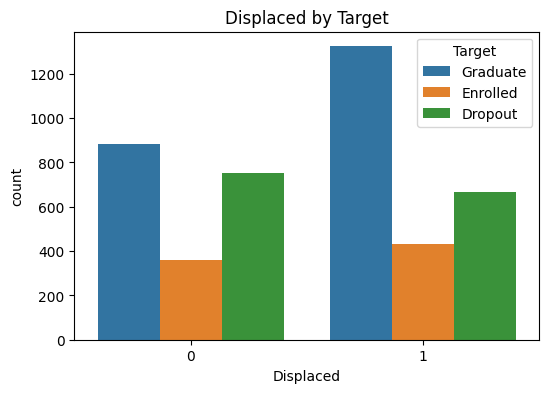

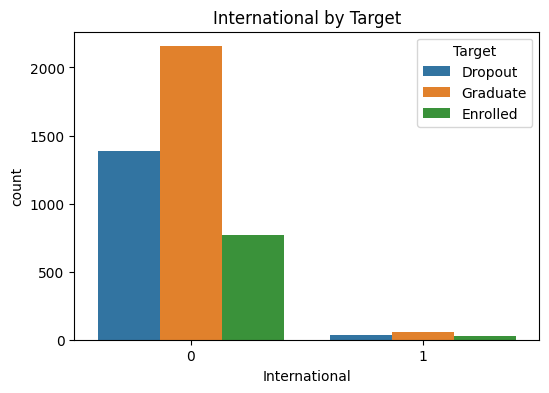

In [7]:
socio_vars = ["Mother's occupation", "Father's occupation", 'Scholarship holder', 'Displaced', 'International']
for var in socio_vars:
    plt.figure(figsize=(6,4))
    if df[var].nunique() < 20:
        sns.countplot(x=var, hue='Target', data=df)
        vc = df.groupby('Target')[var].value_counts().unstack(fill_value=0)
        clean_var_name = (
            var.replace(" ", "_")
               .replace("(", "")
               .replace(")", "")
               .replace("'", "")
               .replace("/", "_")
               .replace("\\", "_")
               .lower()
        )
        vc.to_csv(f'eda_outputs/eda_{clean_var_name}_by_target.csv')
    else:
        for t in df['Target'].unique():
            sns.kdeplot(df[df['Target']==t][var], label=t)
        plt.legend()
    plt.title(f'{var} by Target')
    plt.show()

## 6. Academic Performance at University
We analyze students' university performance, including grades and curricular unit statistics, to see how academic progress relates to dropout or graduation.

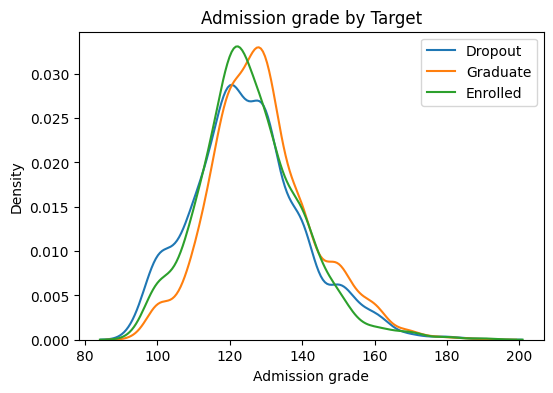

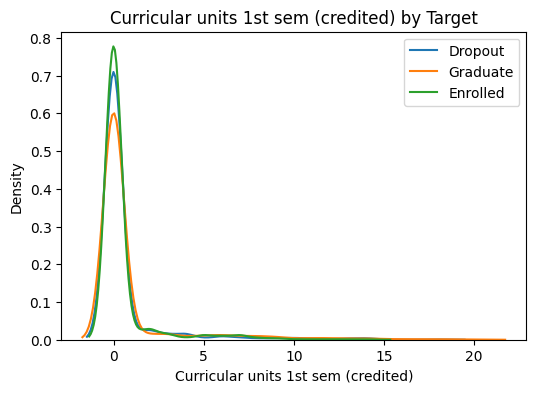

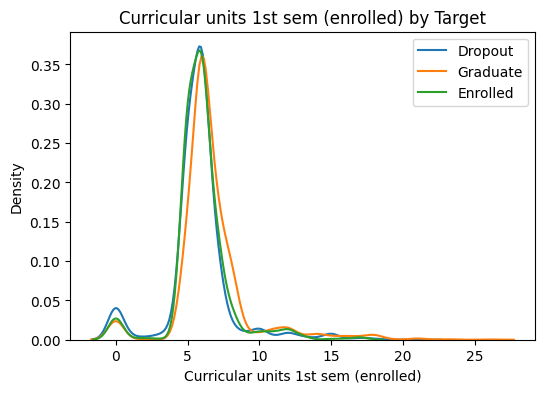

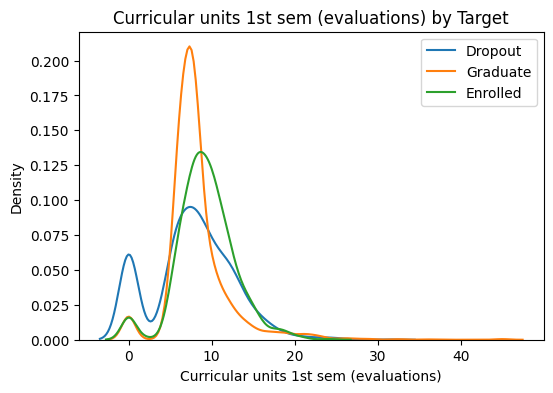

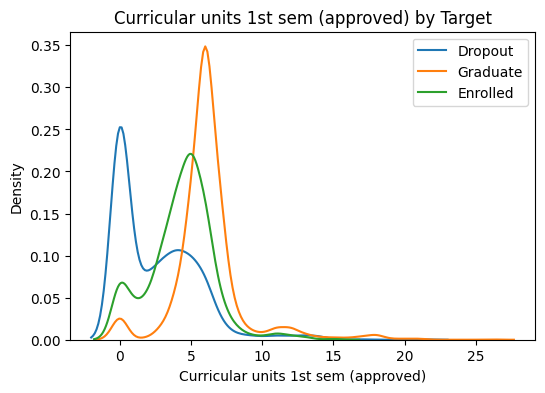

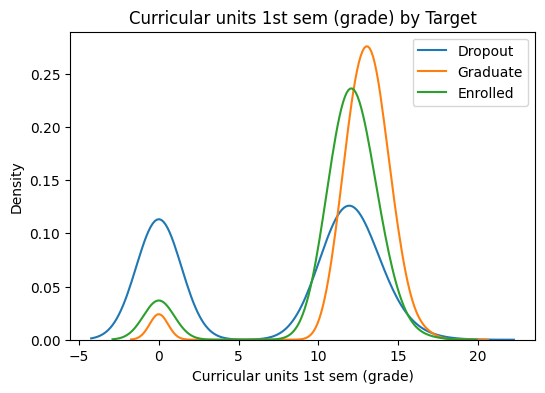

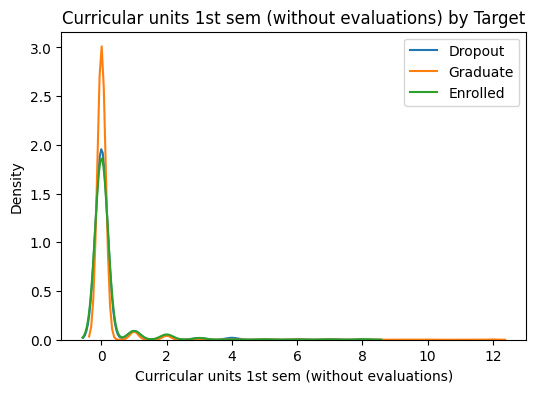

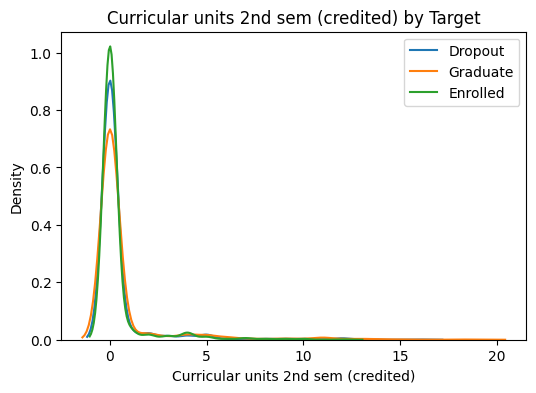

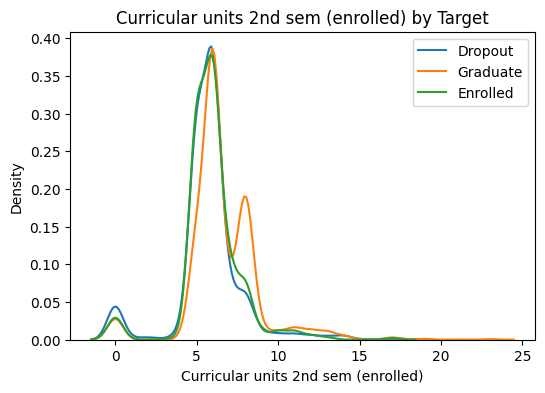

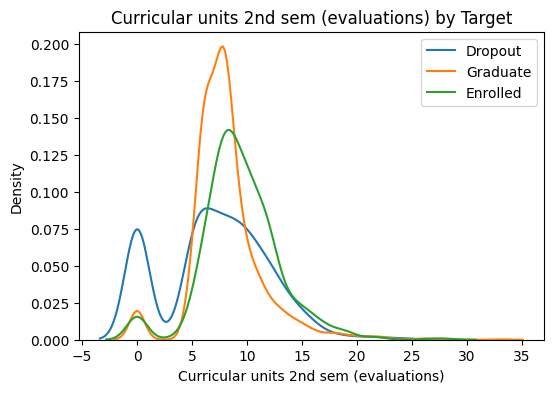

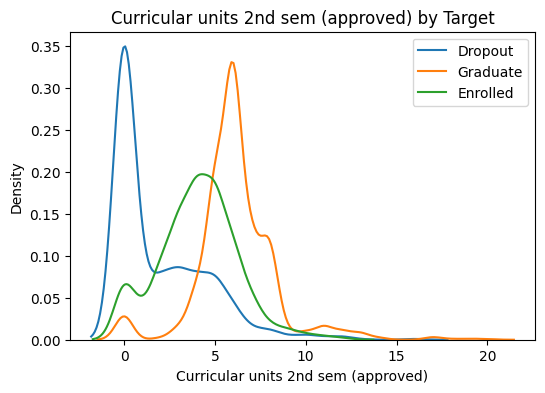

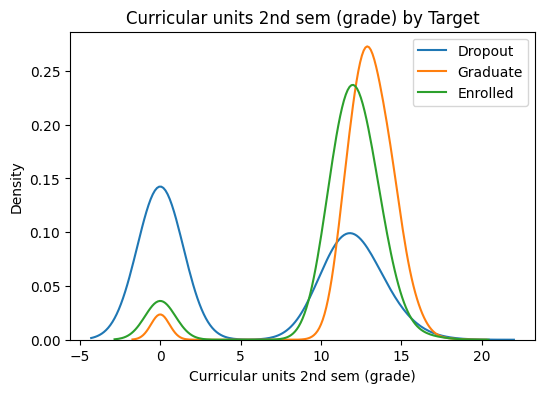

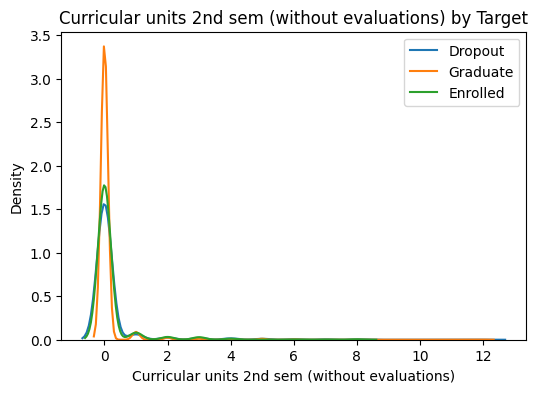

In [8]:
perf_vars = ['Admission grade',
             'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)',
             'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)',
             'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)',
             'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)',
             'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)',
             'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)']
for var in perf_vars:
    plt.figure(figsize=(6,4))
    for t in df['Target'].unique():
        sns.kdeplot(df[df['Target']==t][var], label=t)
    plt.legend()
    plt.title(f'{var} by Target')
    plt.show()
    means = df.groupby('Target')[var].mean()
    clean_var_name = (
        var.replace(" ", "_")
           .replace("(", "")
           .replace(")", "")
           .replace("'", "")
           .replace("/", "_")
           .replace("\\", "_")
           .lower()
    )
    means.to_csv(f'eda_outputs/eda_{clean_var_name}_mean_by_target.csv')

## 7. Financial and Administrative Features
Financial status (debtor, tuition fees up to date) may be linked to dropout risk. We visualize these features by target class.

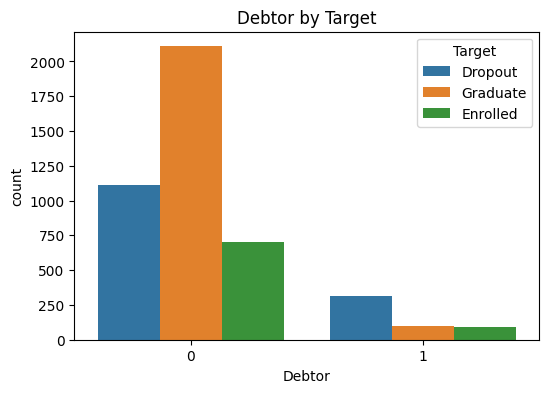

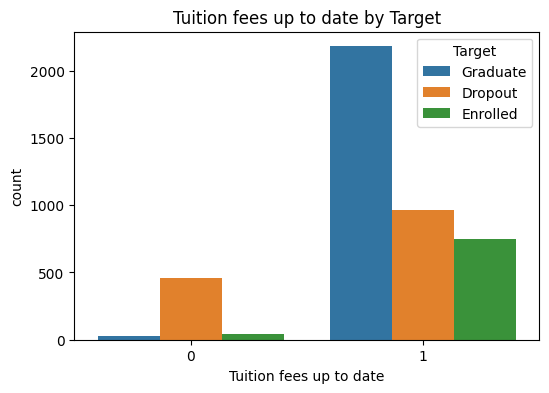

In [9]:
fin_vars = ['Debtor', 'Tuition fees up to date']
for var in fin_vars:
    plt.figure(figsize=(6,4))
    sns.countplot(x=var, hue='Target', data=df)
    plt.title(f'{var} by Target')
    plt.show()
    vc = df.groupby('Target')[var].value_counts().unstack(fill_value=0)
    clean_var_name = (
        var.replace(" ", "_")
           .replace("(", "")
           .replace(")", "")
           .replace("'", "")
           .replace("/", "_")
           .replace("\\", "_")
           .lower()
    )
    vc.to_csv(f'eda_outputs/eda_{clean_var_name}_by_target.csv')

## 8. Course and Enrollment Features
Course choice, application mode, and attendance type may influence student trajectories. We explore these features here.

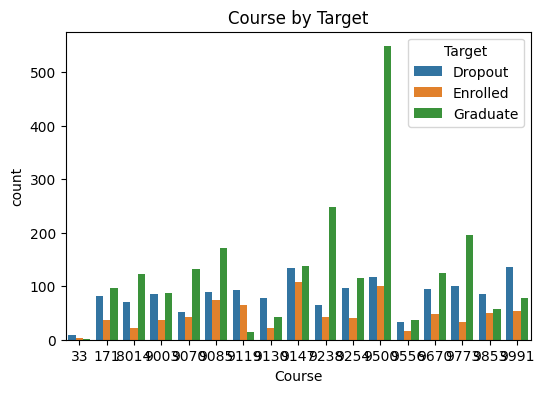

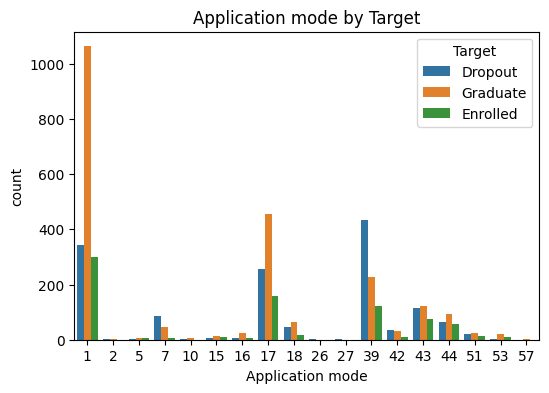

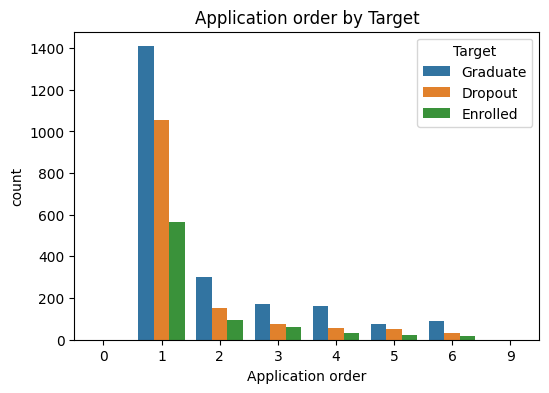

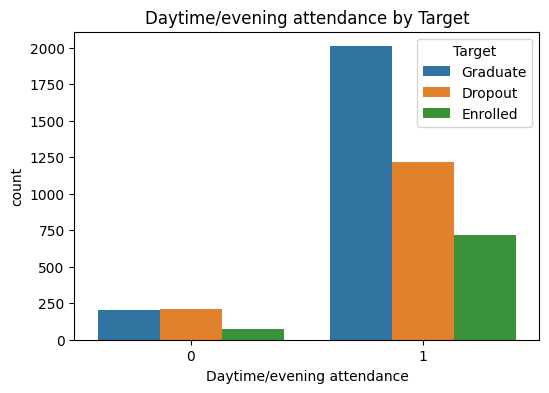

In [10]:
course_vars = ['Course', 'Application mode', 'Application order', 'Daytime/evening attendance']
for var in course_vars:
    plt.figure(figsize=(6,4))
    if df[var].nunique() < 20:
        sns.countplot(x=var, hue='Target', data=df)
        vc = df.groupby('Target')[var].value_counts().unstack(fill_value=0)
        clean_var_name = (
            var.replace(" ", "_")
               .replace("(", "")
               .replace(")", "")
               .replace("'", "")
               .replace("/", "_")
               .replace("\\", "_")
               .lower()
        )
        vc.to_csv(f'eda_outputs/eda_{clean_var_name}_by_target.csv')
    else:
        for t in df['Target'].unique():
            sns.kdeplot(df[df['Target']==t][var], label=t)
        plt.legend()
    plt.title(f'{var} by Target')
    plt.show()

## 9. Macroeconomic Features
Macroeconomic context (unemployment, inflation, GDP) may affect student decisions. We visualize these variables by target class.

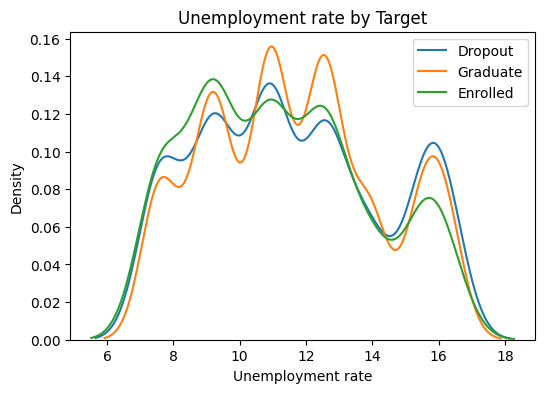

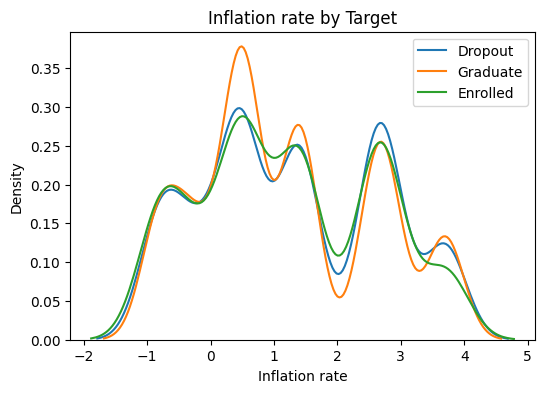

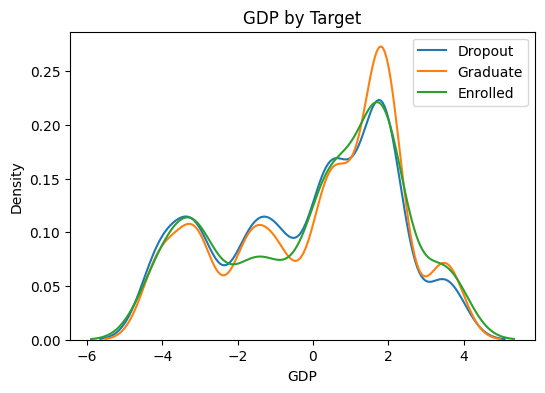

In [11]:
macro_vars = ['Unemployment rate', 'Inflation rate', 'GDP']
for var in macro_vars:
    plt.figure(figsize=(6,4))
    for t in df['Target'].unique():
        sns.kdeplot(df[df['Target']==t][var], label=t)
    plt.legend()
    plt.title(f'{var} by Target')
    plt.show()
    means = df.groupby('Target')[var].mean()
    clean_var_name = (
        var.replace(" ", "_")
           .replace("(", "")
           .replace(")", "")
           .replace("'", "")
           .replace("/", "_")
           .replace("\\", "_")
           .lower()
    )
    means.to_csv(f'eda_outputs/eda_{clean_var_name}_mean_by_target.csv')

## 10. Special Needs
We examine the distribution of students with educational special needs across target classes.

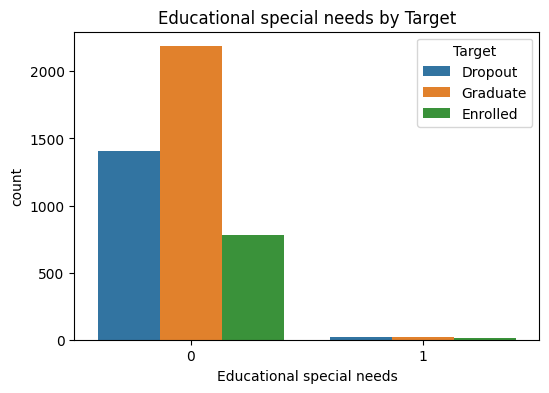

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Educational special needs', hue='Target', data=df)
plt.title('Educational special needs by Target')
plt.show()
vc = df.groupby('Target')['Educational special needs'].value_counts().unstack(fill_value=0)
vc.to_csv('eda_outputs/eda_educational_special_needs_by_target.csv')

## 11. Feature Correlation (Continuous Variables)
A correlation heatmap of continuous features helps identify multicollinearity and informs feature selection for modeling.

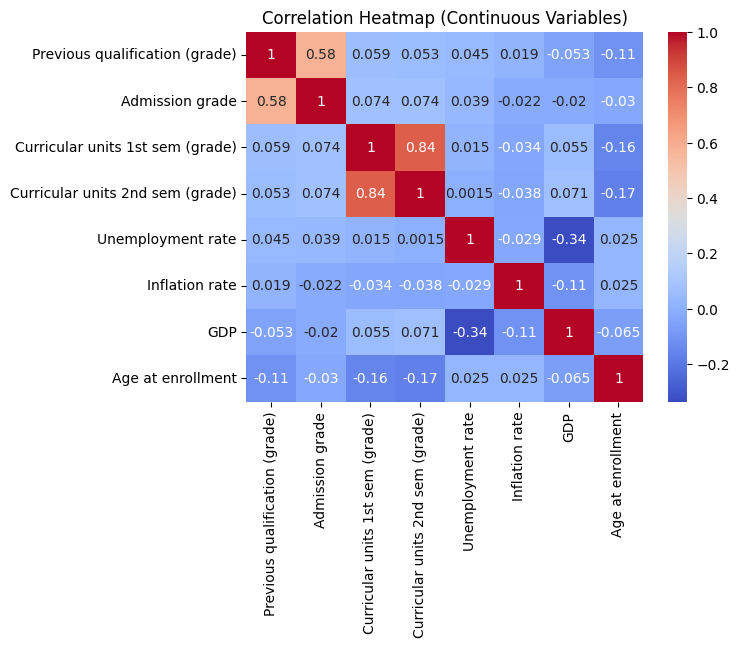

In [13]:
continuous_vars = [
    'Previous qualification (grade)', 'Admission grade',
    'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)',
    'Unemployment rate', 'Inflation rate', 'GDP', 'Age at enrollment'
]
sns.heatmap(df[continuous_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Continuous Variables)')
plt.show()
df[continuous_vars].corr().to_csv('eda_outputs/eda_continuous_feature_correlation.csv') 